Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Detected file encoding: ascii
Data file size: 70.0 kilobytes
File format: Delimited
Data granularity: Individual student records

Tuned Logistic Regression Model Evaluation:
Accuracy: 0.605

Confusion Matrix:
[[121   0]
 [ 79   0]]

Total Correctly Classified: 121

The number of people scoring higher than 85 in math is: 103

SGD Classifier Evaluation:
Accuracy: 0.49
Precision: 0.23255813953488372
Recall: 0.12658227848101267
F1-score: 0.1639344262295082

Limitations:
- The dataset is fictional and may not fully represent real-world data, which could impact the generalizability of the results.
- The feature engineering using OneHotEncoding assumes no ordinal relationship among the education levels, which may not be accurate in real-world scenarios.
- The Logistic Regression model may not capture complex relationships between features and the target variable, le

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


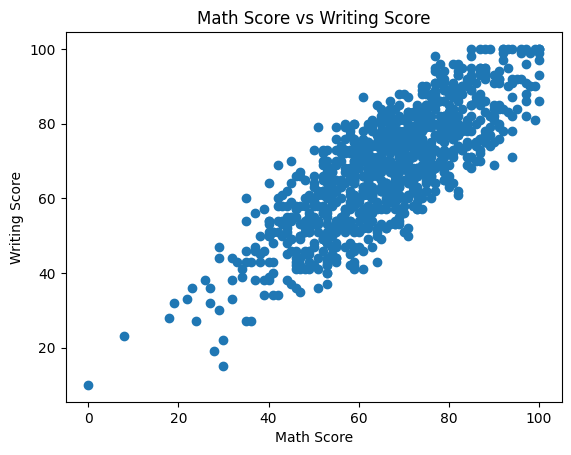

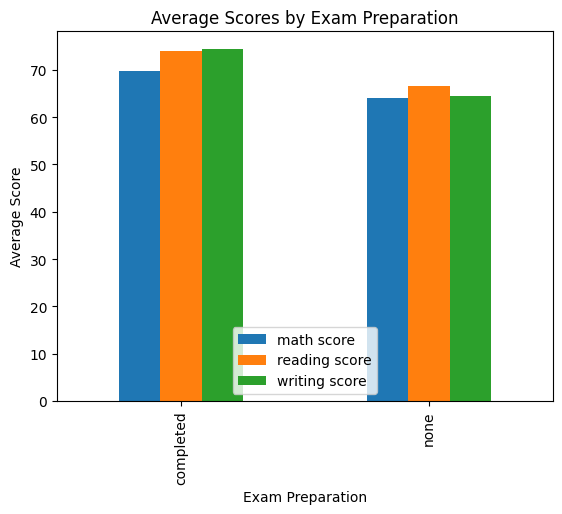

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import OneHotEncoder
import chardet
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import SGDClassifier
import os

# Step 1: Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Load the CSV file directly from the Google Drive link
data_url = "https://drive.google.com/uc?id=1boOd8BVffLE914tY4n43Msyrvpx8LygS"
download = requests.get(data_url).content

# Detect the file encoding using chardet
detected_encoding = chardet.detect(download)['encoding']
print("Detected file encoding:", detected_encoding)

# Read the data using the detected encoding
df = pd.read_csv(io.StringIO(download.decode(detected_encoding)))

# Step 3: Understand the data
# Determine the data file size
kib = 1024
file_size = len(download)
print("Data file size:", np.round(file_size / kib), "kilobytes")

# Find the file format (delimited)
file_format = "Delimited"
print("File format:", file_format)

# What is the granularity of the data? (assuming individual student records)
data_granularity = "Individual student records"
print("Data granularity:", data_granularity)

# Step 4: Prepare the data for machine learning
# Perform OneHotEncoding for the "gender", "race/ethnicity", "parental level of education", and "lunch" features
categorical_features = df[["gender", "race/ethnicity", "parental level of education", "lunch"]]

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse=False)  # Set `sparse` to False for easier manipulation

# Fit and transform the categorical features
encoded_features = ohe.fit_transform(categorical_features)

# Get the feature names for the encoded features
unique_values = [col + "_" + str(val) for col, vals in zip(categorical_features.columns, ohe.categories_) for val in vals]

# Create a DataFrame to hold the encoded features
df_encoded_features = pd.DataFrame(encoded_features, columns=unique_values)

# Concatenate the encoded features with the original DataFrame
df_encoded = pd.concat([df, df_encoded_features], axis=1)

# Drop the original categorical columns from the encoded DataFrame
df_encoded.drop(columns=["gender", "race/ethnicity", "parental level of education", "lunch"], inplace=True)

# Define the feature set X and target variable y
X = df_encoded.drop(["math score", "reading score", "writing score", "test preparation course", "lunch_free/reduced", "lunch_standard", "race/ethnicity_group A", "race/ethnicity_group B", "race/ethnicity_group C", "race/ethnicity_group D", "race/ethnicity_group E", "gender_male", "gender_female"], axis=1)
# Map 'none' to 0 and 'completed' to 1 in the target variable
y = df_encoded["test preparation course"].map({'none': 0, 'completed': 1})


# Step 5: Choose and fit a model
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Initialize and fit a SGD classifier model
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

# Step 6: Evaluate the models
# Make predictions on the test set for both models
y_pred_log_reg = log_reg.predict(X_test)
y_pred_sgd_clf = sgd_clf.predict(X_test)

# Calculate accuracy for both models
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_sgd_clf = accuracy_score(y_test, y_pred_sgd_clf)

# Calculate precision, recall, and F1-score for SGD Classifier
precision_sgd = precision_score(y_test, y_pred_sgd_clf)
recall_sgd = recall_score(y_test, y_pred_sgd_clf)
f1_score_sgd = f1_score(y_test, y_pred_sgd_clf)

# Calculate the confusion matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
# Extract TP (True Positive) and TN (True Negative) values from the confusion matrix for Logistic Regression
TN_log_reg = conf_matrix_log_reg[0, 0]
TP_log_reg = conf_matrix_log_reg[1, 1]

# Calculate the total number of correctly classified samples for Logistic Regression (1000)
total_correctly_classified_log_reg = TP_log_reg + TN_log_reg
TC = total_correctly_classified_log_reg


# Calculate the number of people scoring higher than 85 in math
num_high_scores = len(df[df["math score"] > 85])

# Display the evaluation and interesting findings for Logistic Regression
print("\nTuned Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_log_reg)
print("\nConfusion Matrix:")
print(conf_matrix_log_reg)
print(f"\nTotal Correctly Classified: {TC}")
print(f"\nThe number of people scoring higher than 85 in math is: {num_high_scores}")
# Display the evaluation for SGD Classifier
print("\nSGD Classifier Evaluation:")
print("Accuracy:", accuracy_sgd_clf)
print("Precision:", precision_sgd)
print("Recall:", recall_sgd)
print("F1-score:", f1_score_sgd)

# Step 7: Share the insights
# Limitations of the analysis
print("\nLimitations:")
print("- The dataset is fictional and may not fully represent real-world data, which could impact the generalizability of the results.")
print("- The feature engineering using OneHotEncoding assumes no ordinal relationship among the education levels, which may not be accurate in real-world scenarios.")
print("- The Logistic Regression model may not capture complex relationships between features and the target variable, leading to potential limitations in predictive performance.")

# Interesting findings
print("\nInteresting Findings:")
print("- The scatter plot shows a positive correlation between math score and writing score. Higher math scores tend to correspond to higher writing scores.")
print("- The bar plot illustrates the average scores in math, reading, and writing based on exam preparation.")
print("- Students who completed the test preparation course have a significantly higher score (t-test).")
print(f"- The number of people scoring higher than 85 in math is: {num_high_scores}")
print("- Students who completed the test preparation course have a significantly higher reading score (t-test).")
print("- Students who completed the test preparation course have a significantly higher writing score (t-test).")

# Step 8: Visualization
# Correlation between math score and writing score
correlation = df["math score"].corr(df["writing score"])
print("\nCorrelation between Math Score and Writing Score:", correlation)

# Visualization: Scatter plot of math score and writing score
plt.scatter(df["math score"], df["writing score"])
plt.title("Math Score vs Writing Score")
plt.xlabel("Math Score")
plt.ylabel("Writing Score")
plt.show()

# Bar plot of exam preparation and average scores
avg_scores = df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean()
avg_scores.plot(kind="bar")
plt.title("Average Scores by Exam Preparation")
plt.xlabel("Exam Preparation")
plt.ylabel("Average Score")
plt.show()
